<h1><center>Repaso de Estadística y Probabilidad Fundamental</center><h1>

In [11]:
#%config Completer.use_jedi = False

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 


import sklearn
import scipy as sy 
import statsmodels as sts
import statistics as stat

from pandas_profiling import ProfileReport
import dtale 

In [ ]:
#pd? información de la libreria

In [3]:
data = pd.read_csv('D:/maestria_ciencias_economicas_unal/machine_learning_python/ECNBASIC2017.EC1700BASIC-2021-02-01T175400.csv')

# Datos, variable objetivo y variable predictora

Los datos son observaciónes individuales de un "elemento" o etiqueta, cada elemento tiene una o más observaciones conocidas como "variables", "columnas" o "caracterísitcas"

In [12]:
data.head(3)

,Geographic Area Name (NAME),2017 NAICS code (NAICS2017),Meaning of NAICS code (NAICS2017_LABEL),Meaning of Type of operation code (TYPOP_LABEL),Meaning of Tax status code (TAXSTAT_LABEL),Year (YEAR),Number of firms (FIRM),Number of establishments (ESTAB),"Sales, value of shipments, or revenue ($1,000) (RCPTOT)","Annual payroll ($1,000) (PAYANN)","First-quarter payroll ($1,000) (PAYQTR1)",Number of employees (EMP),"Range indicating percent of total sales, value of shipments, or revenue imputed (RCPTOT_IMP)",Range indicating percent of total annual payroll imputed (PAYANN_IMP),Range indicating percent of total employees imputed (EMP_IMP)
0,United States,21,"Mining, quarrying, and oil and gas extraction",All establishments,All establishments,2017,18.618,25.273,400.465.610,47.500.246,12.599.516,598.620,20% to less than 30%,20% to less than 30%,20% to less than 30%
1,United States,22,Utilities,All establishments,All establishments,2017,5886.000,18.913,577.100.462,67.666.854,20.865.530,658.384,Less than 10%,20% to less than 30%,20% to less than 30%
2,United States,23,Construction,All establishments,All establishments,2017,701.329,715.364,1.994.166.047,398.815.537,89.419.869,6.647.047,10% to less than 20%,Less than 10%,10% to less than 20%


> Variable objetivo: Es la variable a estimar

$$y$$

Cada observación de la variable objetivo se denota $y_{i}$

> Variable predictora: Es la variable o conjunto de variables que conforman las caracterísitcas de la variable objetivo 

$$X$$

cada observación de la variable predictora se denota $x_{i,j}$ dónde $i$ es la observación y $j$ la columna correspondiente 

por ejemplo el dato en la posición $x_{0,2}$ es:

In [13]:
data.iloc[0,2]

'Mining, quarrying, and oil and gas extraction'

***
___

# Medidas de localización

In [23]:
#Promedio aritmético poblacional
np.average(data['Number of firms (FIRM)'])

655.5867666666666

$$\mu_{x} = \frac{\sum_{i=1}^{n} x_{i}}{N} $$

In [19]:
#Moda
stat.mode([1,2,4,3,5,2,6,7,2,5,3,2])

2

In [20]:
#mediana
stat.median(data['Number of firms (FIRM)'])

279.129

In [22]:
#media
stat.mean(data['Number of firms (FIRM)'])

655.5867666666667

In [26]:
#Percentiles
print(np.percentile(data['Number of firms (FIRM)'], 25)) #Percentil 25 == cuartil 1
print(np.percentile(data['Number of firms (FIRM)'], 50)) #percentil 50 == cuartil 2
print(np.percentile(data['Number of firms (FIRM)'], 75)) #percentil 75 == cuartil 3

84.35425000000001
279.129
632.3452500000001


***
___

# Medidas de variabilidad o dispersión

In [27]:
# Rango
data['Number of firms (FIRM)'].max() - data['Number of firms (FIRM)'].min()

5873.73

In [30]:
#Rango intercuartílico
np.percentile(data['Number of firms (FIRM)'], 75) - np.percentile(data['Number of firms (FIRM)'], 25)

547.9910000000001

In [31]:
# varianza poblacional
np.var(data['Number of firms (FIRM)'])

1394734.7022083125

$$\sigma_{x}^{2} = \frac{\sum_{i}^{n}(x_{i}-\mu_{x})^{2}}{N}$$

In [39]:
# desviación estándar 
np.std(data['Number of firms (FIRM)'])/np.mean(data['Number of firms (FIRM)'])

1.801422674004734

$$\sigma_{x} = \sqrt{\sigma_{x}^{2}}$$

In [37]:
# coeficiente de variación
(np.std(data['Number of firms (FIRM)'])/np.mean(data['Number of firms (FIRM)'])*100)

180.1422674004734

$$\frac{s}{\bar{x}}*100$$

***
___

# Distribución y Detección de datos atípicos

## Histograma

In [58]:
employees = data['Number of employees (EMP)'].apply(lambda x: x.replace('.','')).astype('float')

<IPython.core.display.Javascript object>


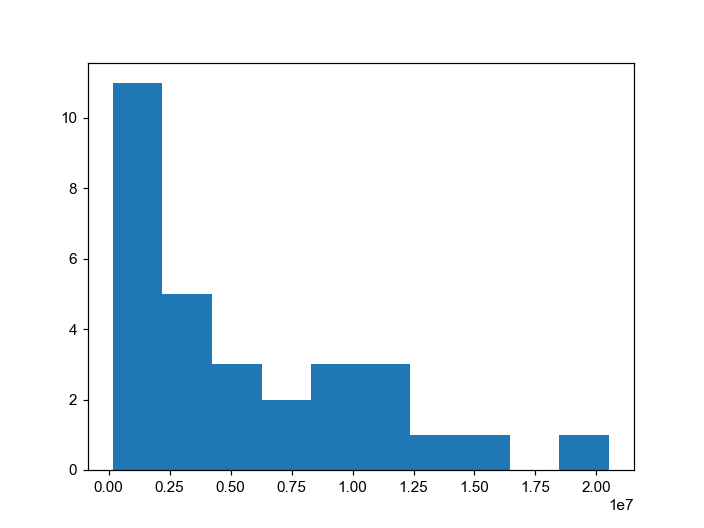

In [60]:
%matplotlib notebook
fig = plt.figure()
plt.hist(employees)
plt.show()

In [8]:
normal = np.random.normal(0,5, 100)
chi_cuadrado = np.random.chisquare(10,100)
uniforme = np.random.uniform(0,5,100)

In [ ]:
#sns.__version__
#%pip install sns --upgrade #actualizar un pquete

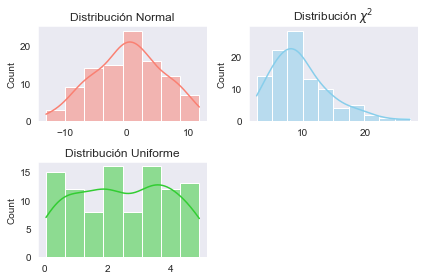

In [9]:
sns.set_style("dark")

fig = plt.figure()
plt.subplot(221)
sns.histplot(normal, kde=True, color='salmon')
plt.title('Distribución Normal')

plt.subplot(222)
sns.histplot(chi_cuadrado,kde = True, color='skyblue')
plt.title('Distribución $\chi^{2}$')

plt.subplot(223)
sns.histplot(uniforme, kde = True, color='limegreen')
plt.title('Distribución Uniforme')
plt.tight_layout()
plt.show()

***

***
___

# Diagrama de caja

<IPython.core.display.Javascript object>


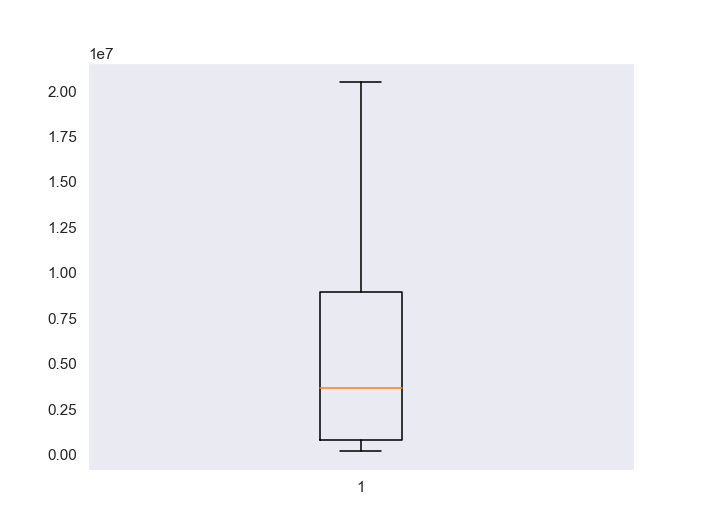

In [96]:
plt.figure()

plt.boxplot(employees)
plt.show()

In [95]:
df = sns.load_dataset('iris') #colores

<IPython.core.display.Javascript object>


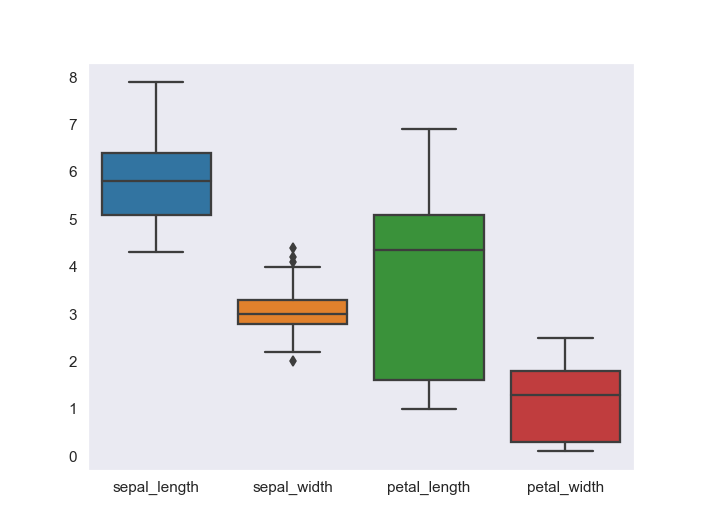

In [101]:
fig = plt.figure()

sns.boxplot(data = df, dodge=True)
plt.show()

****
___

# Medidas de Asociación entre dos variables

## Covarianza

In [110]:
#Covarianza poblacional
def covarianza(X,Y):
    X_mean = X.mean()
    Y_mean = Y.mean()
    
    if len(X) == len(Y):
        cov = sum([(x - X_mean)*(y-Y_mean) for x,y in zip(X,Y)])/len(X)
    return cov

$$\sigma_{x,y} =  \frac{\sum(x_{i}-\mu_{x})(y_{i}-\mu_{y})}{N}$$

In [136]:
employees = data['Number of employees (EMP)'].apply(lambda x: x.replace('.','')).astype('float')
sales = data['Sales, value of shipments, or revenue ($1,000) (RCPTOT)'].apply(lambda x: x.replace('.',"")).astype('float')

In [139]:
covarianza(employees,sales)

4730963480626506.0

## Interpretación

La magnitud de la covarianza no tiene una interpretación certera, el objetivo es idfentifcar si es mayor, menor o cercano a cero:
    
 1. si $\sigma_{x,y} > 0$, decimos que hay una relación lineal positiva entre x e y.
 
Por ende, se espera que incrementos de la variable x generen incrementos en la variable y o viceversa
 
 2. si $\sigma_{x,y} > 0$, decimos que hay una relación lineal negativa entre x e y.
 
Por ende, se espera que incrementos de la variable x generen decrecimientos en la variable y o vicerversa

 3. si $\sigma_{x,y} \approx 0$ decimos que no hay una relación lineal evidente entre x, y
 
Variaciónes en alguna variable no generan variaciones en la otra.

**Nota**:

Es importante aclarar que la correlación no implica causalidad, es decir, podemos estimar la dirección del movimiento de una variable ante variaciones de la otra, pero no podemos especificar que variable causa la variación de la otra.

***
___

## Coeficiente de correlación de Pearson

In [141]:
def corr_pearson(X,Y):
    
    XY_cov = covarianza(X,Y)
    
    X_std = np.std(X)
    Y_std = np.std(Y)
    
    return XY_cov/(X_std*Y_std)    

$$\rho_{x,y} = \frac{\sigma_{x,y}}{\sigma_{x}\sigma{y}}$$

In [142]:
corr_pearson(sales,employees)

0.4312558833346646

## Interpretación

El coeficiente de correlación de pearson muestra un grado de asociación lineal entre dos variables, en este caso va de $-1$ a $1$ y se interpreta dela siguiente manera:

1. si $ 0 < \rho_{x,y} <= 1$ 

Existe una relación positiva entre x e y, si el coeficiente es cercano a 0 esta relación es débil o inexistente, por el contrario si el coeficiente es cercano a 1 la relación es fuerte, si es 1 hay una relación perfecta o se dice que son linealmente dependientes.

2. si $ -1 < \rho_{x,y} < 0$ 

Existe una relación negativa entre x e y, si el coeficiente es cercano a 0 esta relación es débil o inexistente, por el contrario si el coeficiente es cercano a -1 la relación es fuerte, si es -1 hay una relación perfecta o se dice que son linealmente dependientes.

3. si $\rho \approx 0$  

No hay una relación lineal entre x e y, entonces se dice que son linealmente independientes 

***
___

# Diagrama de dispersión o scatterplot

<IPython.core.display.Javascript object>


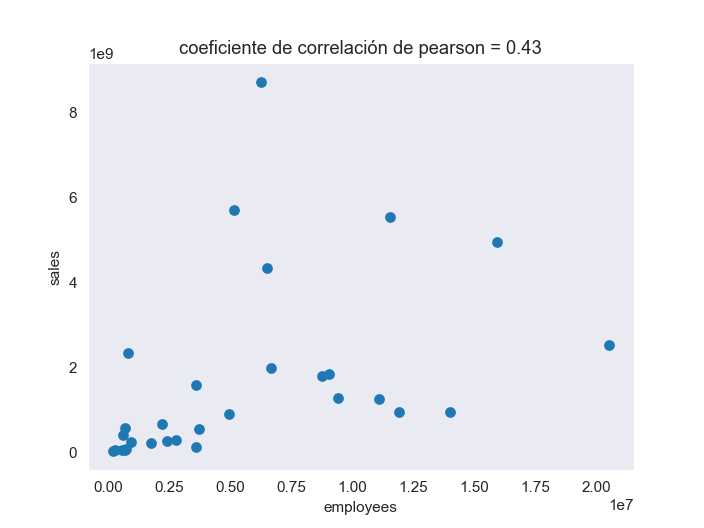

In [230]:
fig = plt.figure()

plt.scatter(x=employees,y=sales)
plt.xlabel('employees')
plt.ylabel('sales')
plt.title('coeficiente de correlación de pearson = {:0.2f}'.format(corr_pearson(employees,sales)))
plt.show()

***
___

<IPython.core.display.Javascript object>


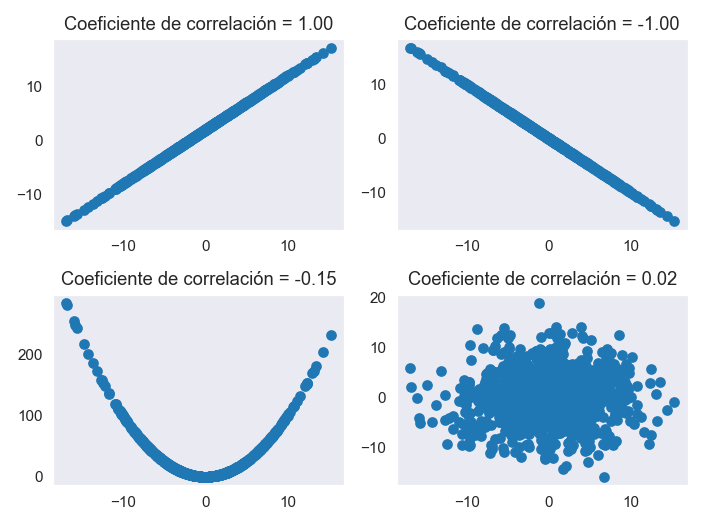

In [229]:
np.random.seed(14)
ejemplo1 = np.random.normal(0,5,1000)
ejemplo2 = ejemplo1 + 2 

ejemplo3 = - ejemplo1
ejemplo4 = ejemplo1**2
ejemplo5 = np.random.normal(0,5,1000)

ejemplos = [ejemplo2,ejemplo3,ejemplo4,ejemplo5]

fig = plt.figure()

for i,j in zip(np.arange(221,226),ejemplos):
    plt.subplot(i)
    plt.scatter(ejemplo1,j)
    plt.title('Coeficiente de correlación = {:0.2f}'.format(corr_pearson(ejemplo1,j)))
    plt.tight_layout()

plt.show()

***
___

<IPython.core.display.Javascript object>


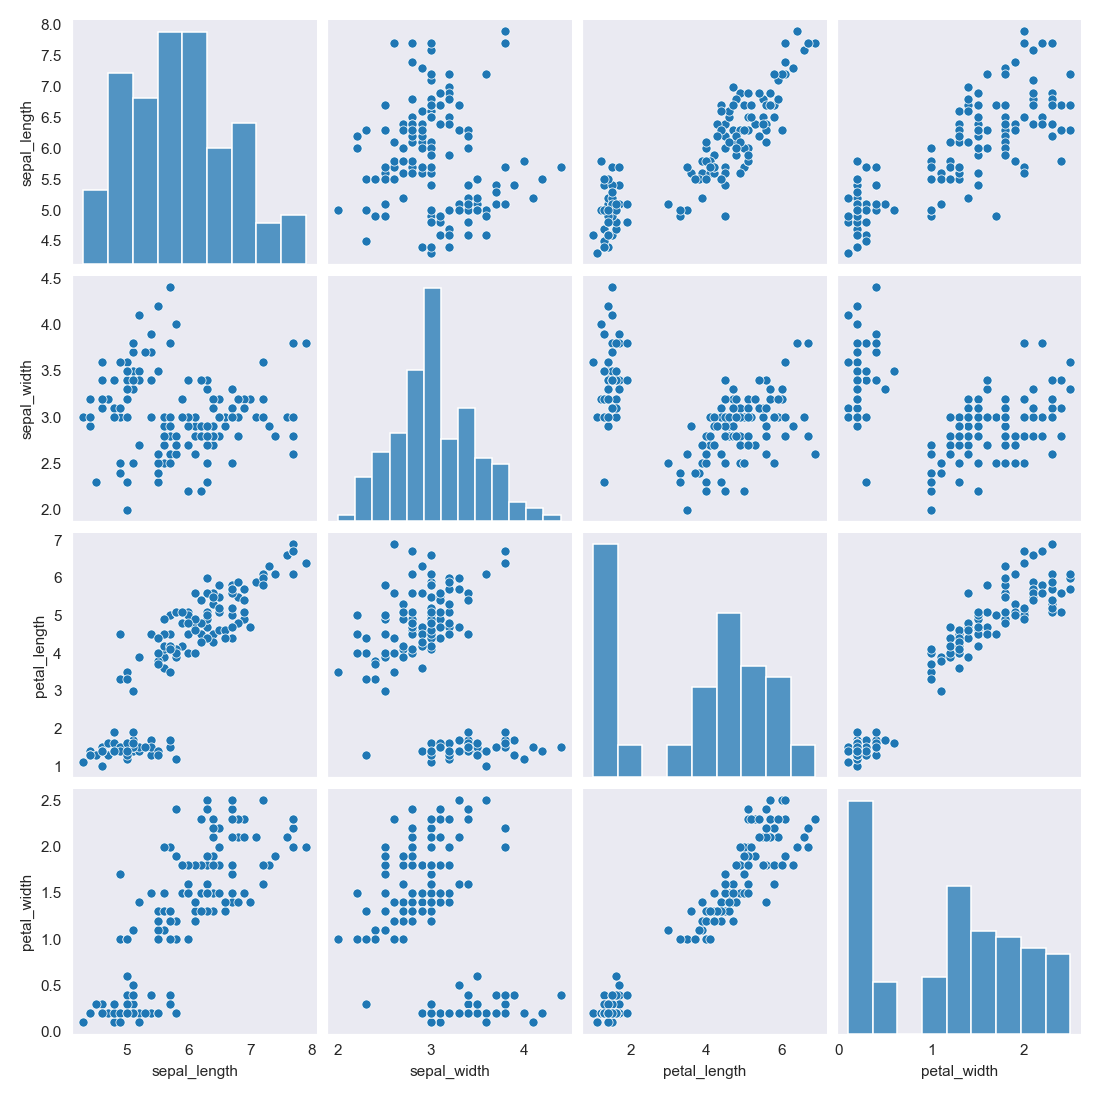

In [225]:
sns.pairplot(df)

***
___

# Matriz de correlación

In [214]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<IPython.core.display.Javascript object>


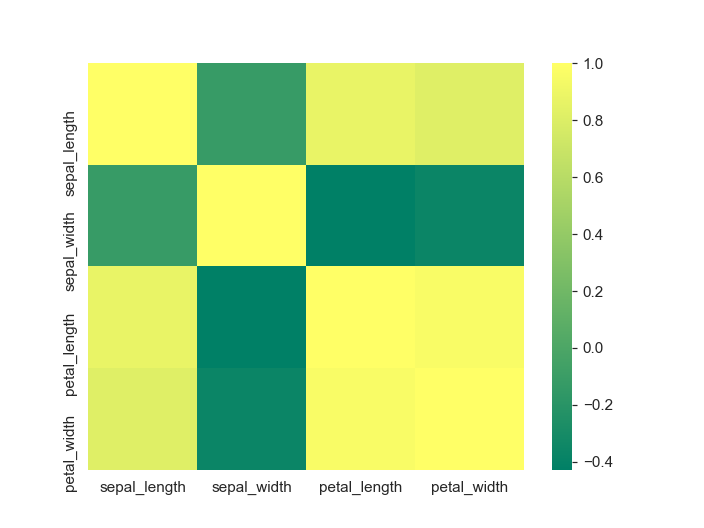

In [226]:
fig = plt.figure()

sns.heatmap(df.corr(), cmap='summer')
plt.show()

***
___

## Resumen Estadístico 

In [216]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<IPython.core.display.Javascript object>


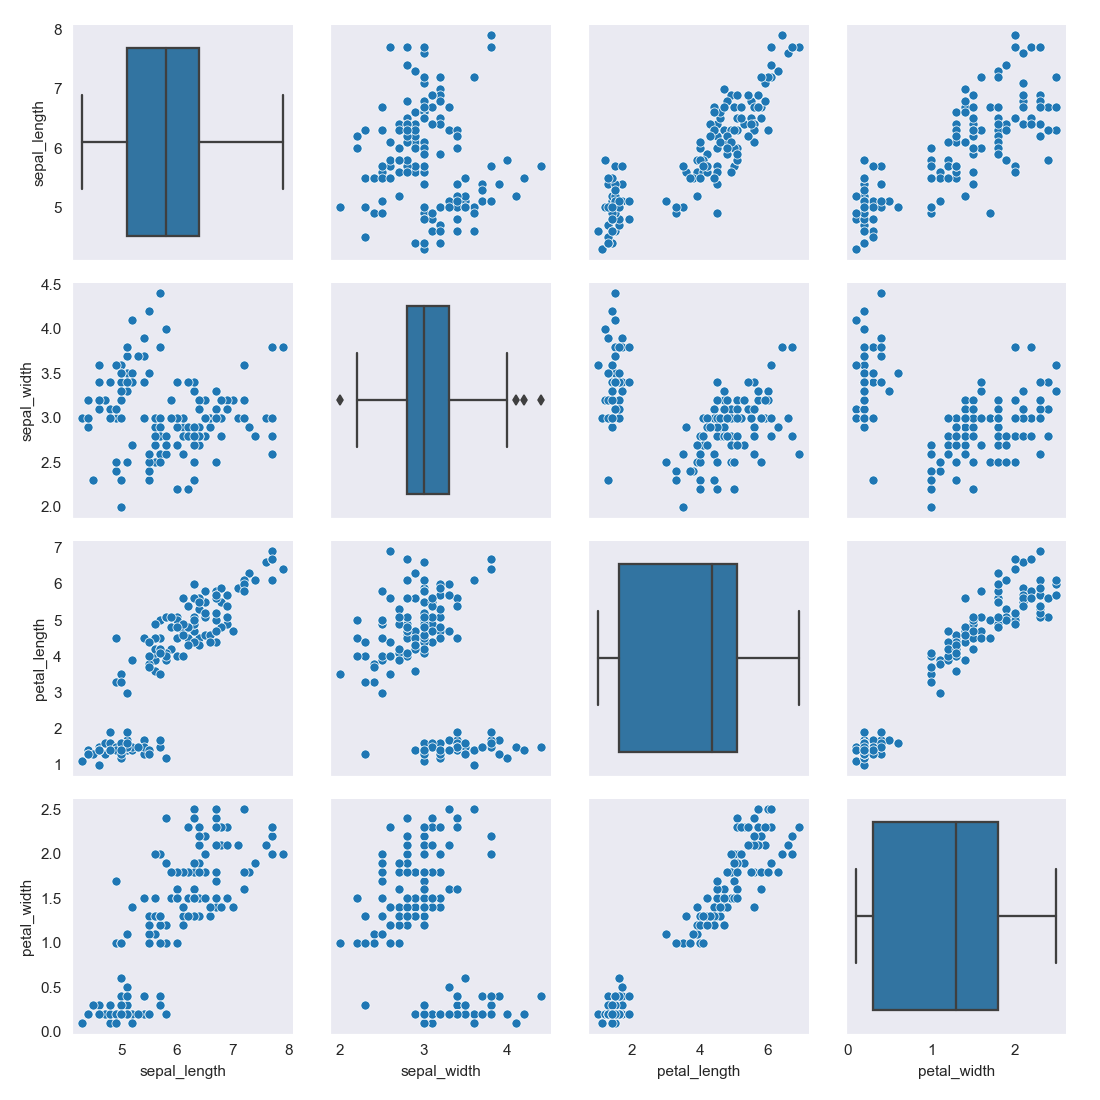

In [224]:
fig = sns.PairGrid(df.iloc[:,:-1])

# fig.map_lower(sns.boxplot)
fig.map_offdiag(sns.scatterplot) #diagrama por fuera de la diagonal
fig.map_diag(sns.boxplot) #en la diagolan muestra el boxlot

# Pandas profiling

In [ ]:
report = ProfileReport(data, 'Resumen Estadísitco') #reporte estadístico, overview

## Dtale

In [17]:
d = dtale.show(data, ignore_duplicate = True) #generar otro reporte, e ignora los reportes duplicados, intentar subirlo a datapain

In [ ]:
#exportar en html "d.open browser"